<a href="https://colab.research.google.com/github/ferdouszislam/Weather-WaterLevel-Prediction-ML/blob/main/Notebooks/brri-dataset/experimentations/KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#@title Default title text
# # the imports in this cell are required when running on local device
# import os, sys
# sys.path.append(os.path.join('..', '..'))
# from utils.applyML_util import train_classification, eval_classification
# from utils.featureSelection_util import (pearson_correlation_fs, 
#                                          seleckKBest_fs, selectSequential_fs)

In [10]:
# the imports in this cell are required when running from Cloud (Colab/Kaggle)
# before running on cloud you nee to upload the .py files 
# from 'Notebooks/utils' directory
from applyML_util import train_classification, eval_classification, showEvalutationGraph_classification
from featureSelection_util import (pearson_correlation_fs, 
                                   seleckKBest_fs, selectSequential_fs)

**K Nearest Neigbors Documentation link:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

In [27]:
# global random seed
RAND_SEED = 42

# initial model with only random seed and not any hyper-parametes
initial_model = KNeighborsClassifier()

# hyper-parameters
n_neighbors = [x for x in range(1,31)]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
#p = ['1','2']
metric = ['euclidean','minkowski']
# dictonary of all hyperparameters
param_grid = {'n_neighbors': n_neighbors, 'weights': weights, 'metric': metric}

# variables needed for showEvalGraph_regression() function
MODEL_CLASS = KNeighborsClassifier
class_label = 'Rainfall'
x_axis_param_name = 'n_neighbors'
x_axis_param_vals = n_neighbors

## 1. Experimentation on the Weather Daily Dataset

In [13]:
# Load the train dataset
weather_daily_train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_train_classification.csv')

# Load the test set
weather_daily_test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_test_classification.csv')

### 1.0 No technique

In [38]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'metric': 'euclidean', 'n_neighbors': 24, 'weights': 'distance'}
Train set performance: accuracy=0.7317, macro-f1=0.5367


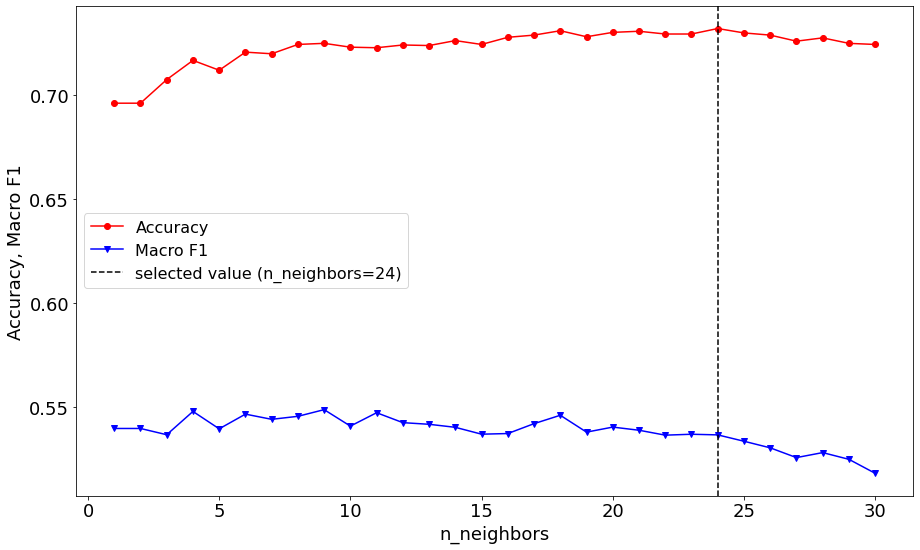

In [39]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams


showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [40]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7482, macro-f1=0.5246


### 1.1 Apply Pearson Feature Selection to Daily Weather Dataset

In [41]:
# select features from the train dataset
weather_daily_fs1_train_df, cols_to_drop = pearson_correlation_fs(weather_daily_train_df, class_label)

# keep only selected features on the test dataset
weather_daily_fs1_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

dropping Sunshine (hour/day) from (Cloudy (hour/day), Sunshine (hour/day))


In [46]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs1_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Train set performance: accuracy=0.7331, macro-f1=0.5495


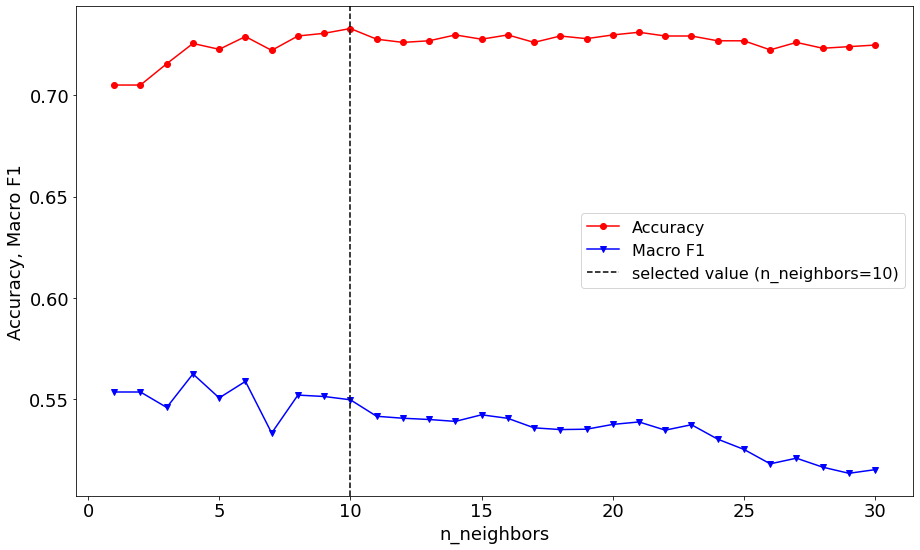

In [47]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams


showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs1_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [48]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs1_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.7524, macro-f1=0.5536


### 1.2 Apply SelectKBest Feature Selection to Daily Weather Dataset

In [49]:
# select features from the train dataset
weather_daily_fs2_train_df, cols_to_drop = seleckKBest_fs(weather_daily_train_df, class_label, is_regression=True)

print('features dropped:', cols_to_drop)

# keep only selected features on the test dataset
weather_daily_fs2_test_df = weather_daily_test_df.drop(columns=cols_to_drop)

features dropped: ['Max Temp. (degree Celcius)', 'Sunshine (hour/day)']


In [50]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs2_train_df, cls=class_label)
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

Selected hyperparameters: {'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'distance'}
Train set performance: accuracy=0.7349, macro-f1=0.5546


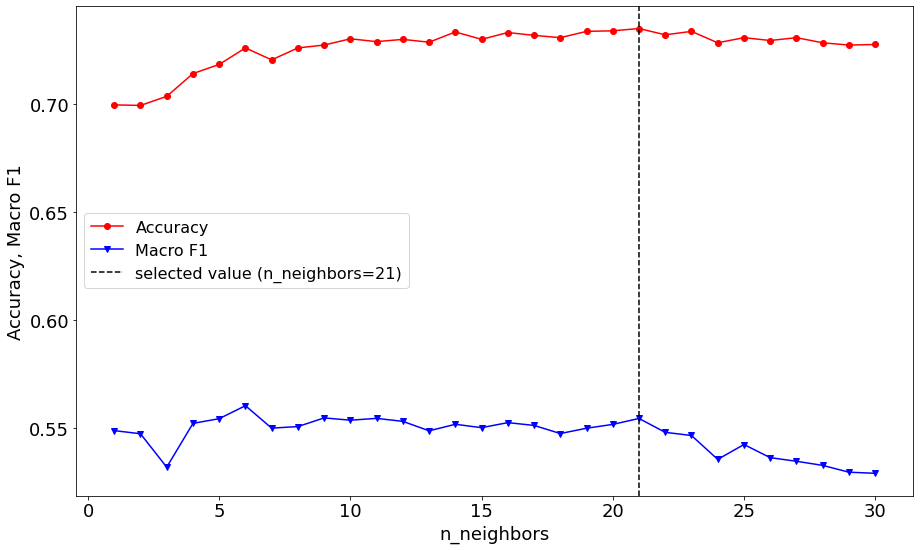

In [51]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams


showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs2_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [52]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs2_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.746, macro-f1=0.5511


### 1.3 SMOTE on Daily Dataset

In [53]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, 
                                                                             cls=class_label, sampling_technique='smote')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {1: 2477, 0: 2477, 2: 2477}
Selected hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Train set performance: accuracy=0.8926, macro-f1=0.8912


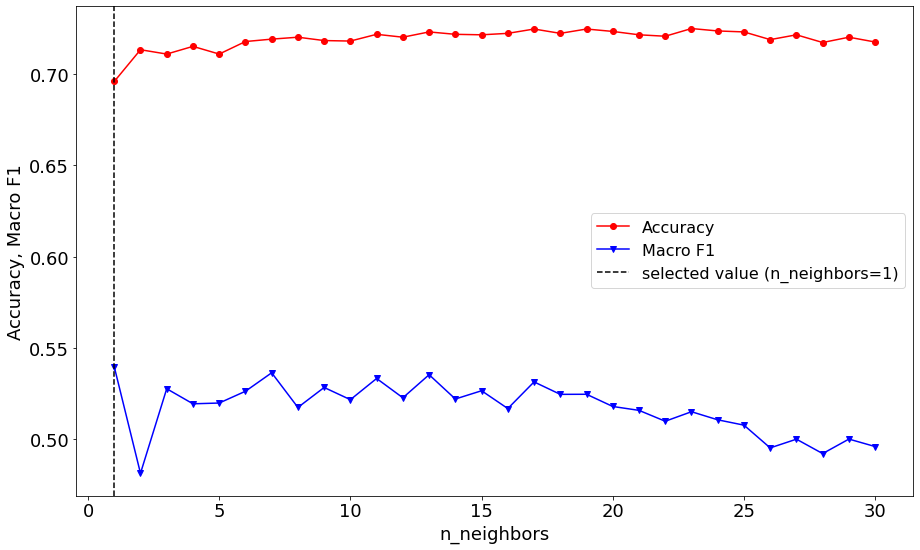

In [54]:
# r2-scores graph on the train set

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams


showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [55]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.6807, macro-f1=0.541


### 1.4 Random Undersampling + SMOTE on Daily Dataset

In [59]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Train set performance: accuracy=0.8714, macro-f1=0.8699


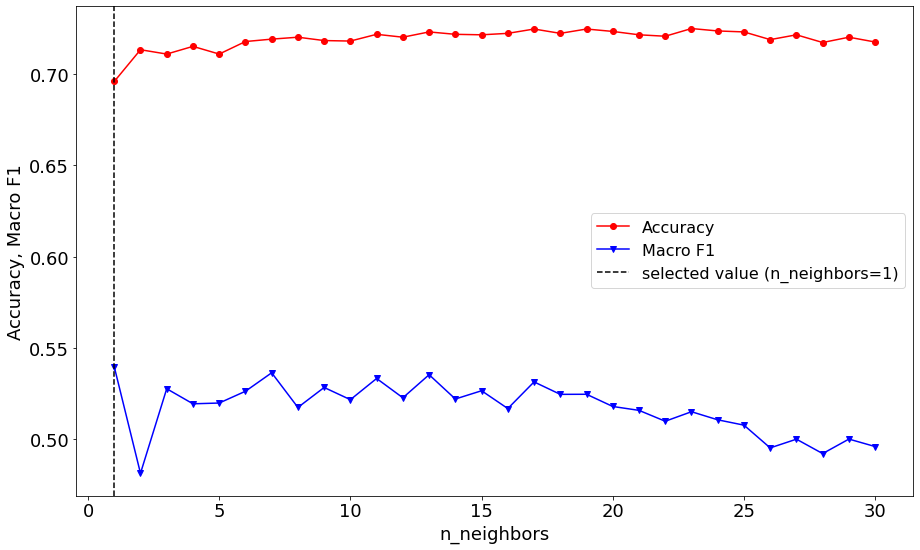

In [60]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams


showEvalutationGraph_classification(MODEL_CLASS, weather_daily_train_df, cls=class_label, 
                                    x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                    selected_model_params=selected_model_params)

In [61]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.6639, macro-f1=0.5216


### 1.5 Pearson Feature Selection + Hybrid Sampling to Daily Weather Dataset

In [62]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs1_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Train set performance: accuracy=0.878, macro-f1=0.8765


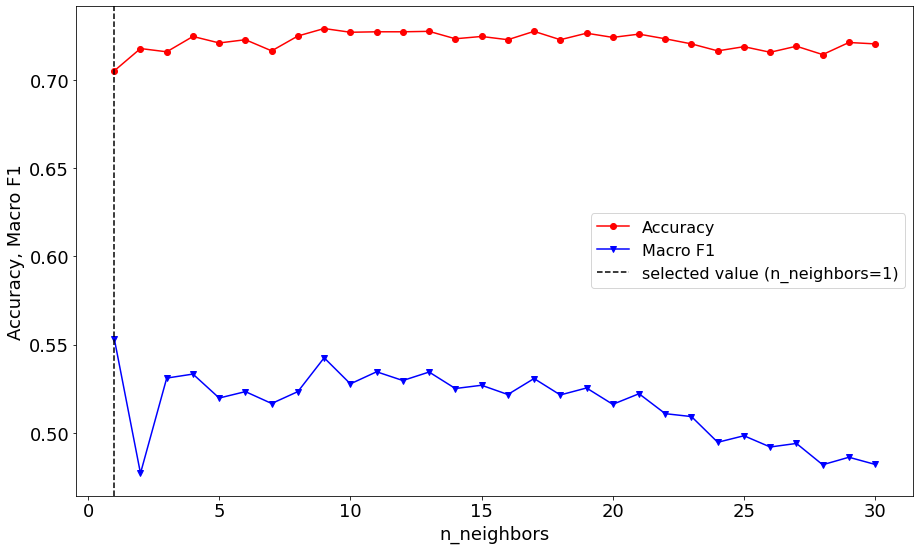

In [63]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams


showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs1_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [64]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs1_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.6702, macro-f1=0.529


### 1.6 SelecKBest Feature Selection + Hybrid Sampling to Daily Weather Dataset

In [67]:
# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(initial_model, param_grid, weather_daily_fs2_train_df, 
                                                                             cls=class_label, sampling_technique='hybrid')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

class distribution before sampling: {1: 1008, 0: 2477, 2: 310}
class distribution after sampling: {0: 1981, 1: 1981, 2: 1981}
Selected hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Train set performance: accuracy=0.8688, macro-f1=0.8674


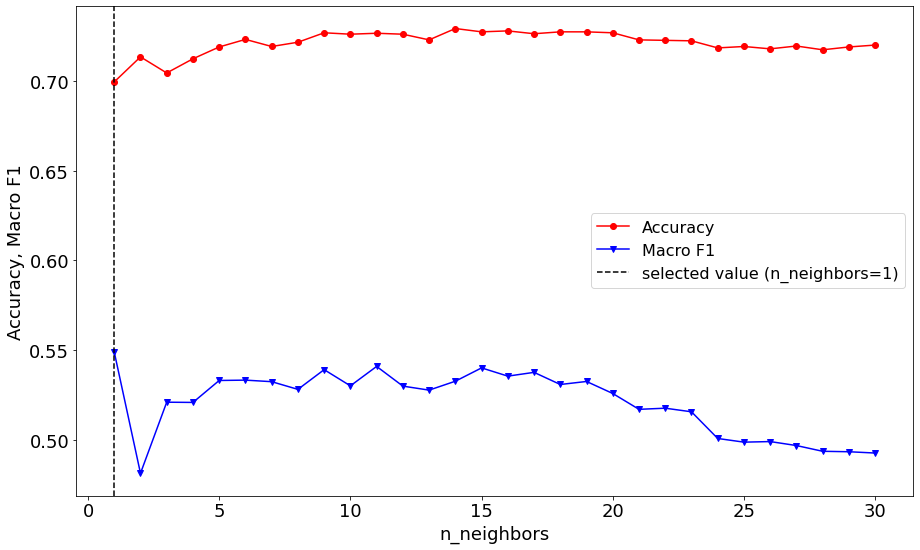

In [68]:
# graph on train set performance

# hyper-parameters selected by GridSearchCV
selected_model_params = selected_hyperparams


showEvalutationGraph_classification(MODEL_CLASS, weather_daily_fs2_train_df, cls=class_label, 
                                x_axis_param_name=x_axis_param_name, x_axis_param_vals=x_axis_param_vals, 
                                selected_model_params=selected_model_params)

In [69]:
# test model
test_accuracy, test_f1 = eval_classification(model, weather_daily_fs2_test_df, cls=class_label)
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Test set performance: accuracy=0.6617, macro-f1=0.5368
